# Characters per Chapter

What are the major characters per chapter? 

In [119]:
import spacy
import re
import pandas as pd
from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
nlp = spacy.load('en')

In [17]:
mm = open('../middlemarch.txt').read()
# mm = nlp(mmRaw)

In [18]:
textALength = len(mmRaw)

In [19]:
# Get chapter locations
chapterMatches = re.finditer('PRELUDE|CHAPTER|FINALE', mm)
chapterLocations = [match.start() for match in chapterMatches]
chapterLocations.append(textALength) # Add one to account for last chunk. 
len(chapterLocations)

89

In [20]:
# Extract chapters
chapters = []
for start, end in zip(chapterLocations, chapterLocations[1:]): 
     chapters.append(mm[start:end])

In [22]:
chapterDocs = [nlp(chapter) for chapter in chapters]

In [23]:
prelude = chapterDocs[0]

In [27]:
theresa = prelude.ents[1]

In [64]:
def getPeople(doc): 
    return Counter([ent.text.strip() for ent in doc.ents if ent.label_ == 'PERSON'])

In [65]:
people = [getPeople(chapter) for chapter in chapterDocs]

In [126]:
topFourPeople = [getPeople(chapter).most_common(4) for chapter in chapterDocs]
topFourPeople

[[('Saint Theresa', 2), ('Avila', 1), ('Theresa', 1)],
 [('Celia', 36), ('Dorothea', 13), ('Brooke', 12), ('James Chettam', 2)],
 [('Brooke', 23), ('Casaubon', 18), ('Celia', 16), ('James', 14)],
 [('Casaubon', 19), ('Dorothea', 18), ('Brooke', 16), ('James', 11)],
 [('Dorothea', 16), ('Celia', 14), ('Brooke', 14), ('James', 11)],
 [('Celia', 26), ('Casaubon', 22), ('Dorothea', 18), ('Dodo', 6)],
 [('Cadwallader', 27), ('Brooke', 24), ('James', 15), ('Celia', 8)],
 [('Casaubon', 13), ('Dorothea', 7), ('Brooke', 6), ('Celia', 3)],
 [('James', 14), ('Brooke', 13), ('Rector', 8), ('Casaubon', 7)],
 [('Casaubon', 33), ('Celia', 21), ('Dorothea', 19), ('Brooke', 17)],
 [('Brooke', 21), ('Casaubon', 15), ('Lydgate', 12), ('Standish', 7)],
 [('Fred', 19), ('Vincy', 15), ('Rosamond', 10), ('Lydgate', 8)],
 [('Mary', 33), ('Rosamond', 32), ('Fred', 30), ('Featherstone', 28)],
 [('Bulstrode', 19), ('Vincy', 16), ('Fred', 11), ('Lydgate', 9)],
 [('Fred', 30), ('Mary', 22), ('Featherstone', 13), (

In [66]:
people

[Counter({'Avila': 1, 'Saint Theresa': 2, 'Theresa': 1}),
 Counter({'Brooke': 12,
          'Cadwallader': 1,
          'Celia': 36,
          'Dorothea': 13,
          'Edward Casaubon': 1,
          'James Chettam': 2,
          'Jeremy Taylor': 1,
          'John': 1,
          'John Milton': 1,
          'Kitty': 1,
          'Madame Poincon': 2,
          'Pascal': 1,
          'Peel': 1,
          'Rector': 1,
          'Sane': 1}),
 Counter({'Adam Smith': 1,
          'Brooke': 23,
          'Cartwright': 2,
          'Casaubon': 18,
          'Casaubon?--if': 1,
          'Celia': 16,
          'Celia\n\n"': 1,
          'Chettam': 1,
          'Corydon': 1,
          'Davy': 3,
          'Don Quijote."--CERVANTES.': 1,
          'Don Quixote': 1,
          'Dorothea': 9,
          'Humphry Davy': 1,
          'James': 14,
          'James Chettam': 2,
          "James Chettam's": 1,
          'Lo': 1,
          'Locke': 3,
          'Monsieur Liret': 1,
          'Southey': 1,

In [51]:
df = pd.DataFrame(people).fillna(0)

In [53]:
allChars = df.columns
list(allChars)

['',
 'Abel',
 'Abraham',
 'Adam',
 'Adam Smith',
 'Adolf',
 'Adolf Naumann',
 'Adonis',
 'Aiutatemi',
 'Alfred',
 'Althorpe',
 'Amore',
 'Antichrist',
 'Aphis Brassicae',
 'Apollos',
 'Aquinas',
 'Arabella Hawley',
 'Archdeacon',
 'Archie Duncan',
 'Arthur',
 'Asia Minor',
 'Augustine',
 'Aunt Julia',
 "Aunt Julia's",
 'Avila',
 'B.A.',
 'Ba-Lamb',
 'Baal',
 'Baby',
 'Bagster',
 'Bailey',
 'Baldwin',
 'Ballard',
 'Balstrode',
 'Bam',
 'Bambridge',
 'Baronet',
 'Batti',
 'Beck',
 'Beevor',
 'Ben',
 'Bichat',
 'Bilkley',
 'Bill',
 'Blast',
 'Blindman',
 'Blucher',
 'Bob',
 'Boguy',
 'Borrow',
 'Borthrop',
 'Borthrop Trumbull',
 "Borthrop Trumbull's",
 'Bossuet',
 'Botolph',
 'Bott',
 'Bouddha',
 'Bowyer',
 'Bradwardine',
 'Brasenose',
 'Brassing',
 'Brenda Troil',
 'Bretton',
 'Briggs',
 'Brooke',
 "Brooke's",
 'Brookes',
 'Brougham',
 'Browne',
 'Brownie',
 'Bruce',
 'Bryant',
 'Buffoonery',
 'Bulstrode',
 "Bulstrode's",
 'Bulstrodes',
 'Bunch?--well',
 'Bunyan',
 'Burke',
 'Byles',
 '

In [127]:
casaubons = [char for char in allChars if 'Casaubon' in char]
charDict = {char: [name for name in allChars if char in name] 
            for char in ['Casaubon', 'Dorothea', 'Celia', 'James', 'Rosamond', 'Mary', 
                         'Lydgate', 'Bulstrode', 'Raffles', 'Fred', 'Cadwallader', 
                         'Ladislaw', 'Caleb']}

In [128]:
charDict

{'Bulstrode': ['Bulstrode',
  "Bulstrode's",
  'Bulstrodes',
  'Ellen Bulstrode',
  'Nicholas\nBulstrode',
  'Nicholas Bulstrode'],
 'Cadwallader': ['Cadwallader',
  'Cadwallader--"when',
  'Cadwalladers',
  'Mrs Cadwallader'],
 'Caleb': ['Caleb',
  'Caleb Garth',
  "Caleb Garth's",
  'Farebrother"--here Caleb',
  'Featherstone Caleb'],
 'Casaubon': ['Casaubon',
  "Casaubon's",
  'Casaubon--"about',
  'Casaubon?--if',
  'Casaubons',
  'Edward Casaubon',
  'Mr Casaubon'],
 'Celia': ['Celia', 'Celia\n\n"'],
 'Dorothea': ['Dorothea', 'Dorothea "', 'Dorothea Brooke'],
 'Fred': ['Fred', 'Fred\nVincy', 'Fred Vincy', "Fred Vincy's", 'Frederic'],
 'James': ['Charles James Fox',
  'James',
  'James Chettam',
  "James Chettam's",
  'King James'],
 'Ladislaw': ['Ladislaw',
  'Ladislaw?--shall',
  'Ladislaws',
  'Orlando Ladislaw',
  'Will Ladislaw',
  "Will Ladislaw's",
  'Young Ladislaw'],
 'Lydgate': ['Godwin Lydgate', "Godwin Lydgate's", 'Lydgate', 'Lydgates'],
 'Mary': ['Mary',
  'Mary\nGarth

In [129]:
# Add other known names. 
charDict['Ladislaw'].append('Will')
# charDict['Dorothea'].append('Miss Brooke')

# Remove erroneous names. 
charDict['Bulstrode'].remove('Ellen Bulstrode')

In [130]:
df

,,Abel,Abraham,Adam,Adam Smith,Adolf,Adolf Naumann,Adonis,Aiutatemi,Alfred,...,Xisuthrus,Yew,Yo,Yo goo'--that's,Yoddrell,Young,Young Cranch,Young Hawley,Young Ladislaw,Young Plymdale
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
dfNew = pd.DataFrame()

In [132]:
dfNew['Dorothea'] = df[charDict['Dorothea']].sum(axis=1)

In [133]:
charTotals = {char: df[charDict[char]].sum(axis=1) for char in charDict}

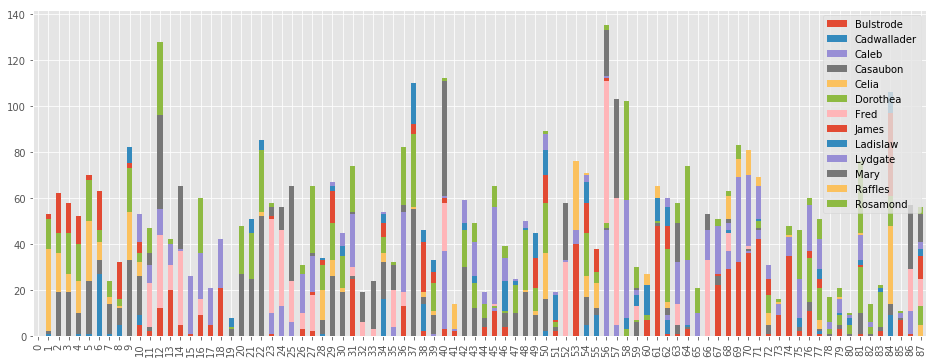

In [134]:
charDF = pd.DataFrame(charTotals)
charDF.plot(kind='bar', stacked=True, figsize=(16, 6))

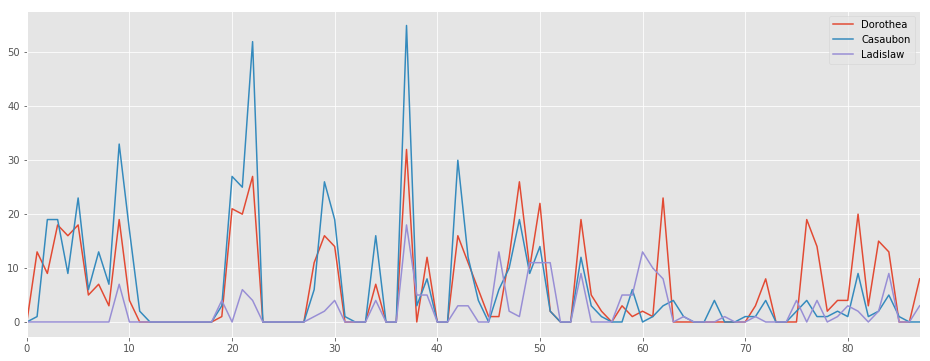

In [136]:
charDF[['Dorothea', 'Casaubon', 'Ladislaw']].plot(figsize=(16,6))

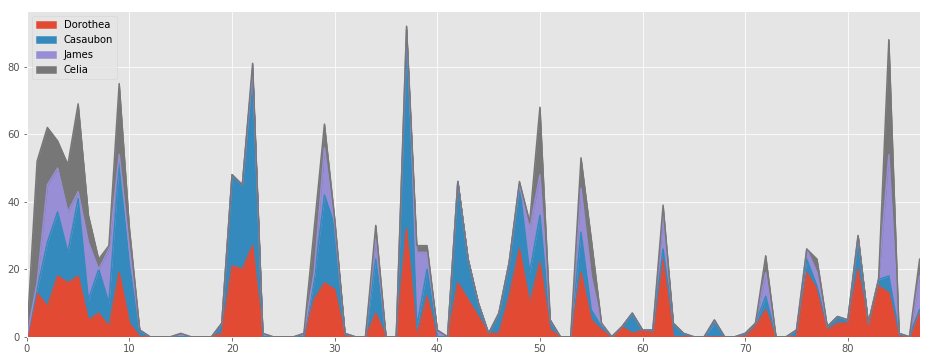

In [141]:
charDF[['Dorothea', 'Casaubon', 'James', 'Celia']].plot(kind='area', figsize=(16,6))

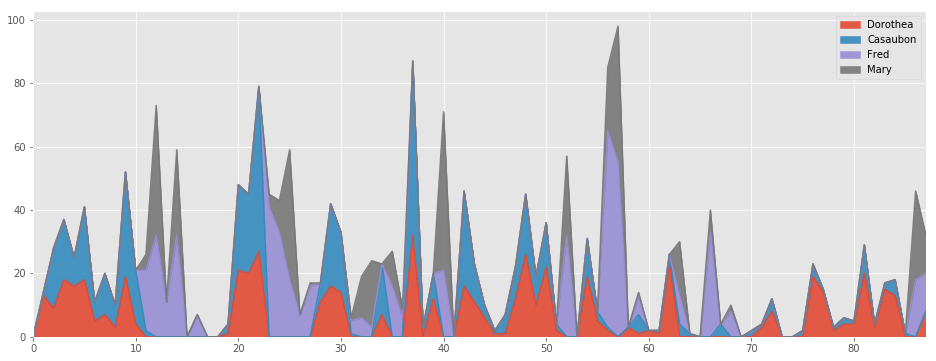

In [123]:
charDF[['Dorothea', 'Casaubon', 'Fred', 'Mary']].plot(kind='area', figsize=(16,6), alpha=0.9)

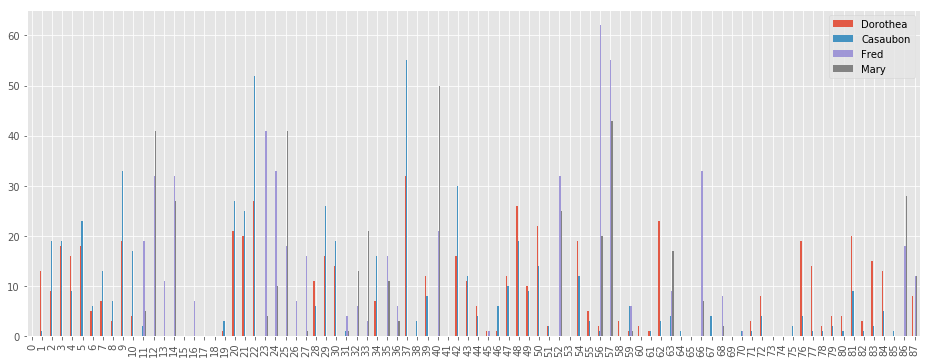

In [125]:
charDF[['Dorothea', 'Casaubon', 'Fred', 'Mary']].plot(kind='bar', figsize=(16,6), alpha=0.9)